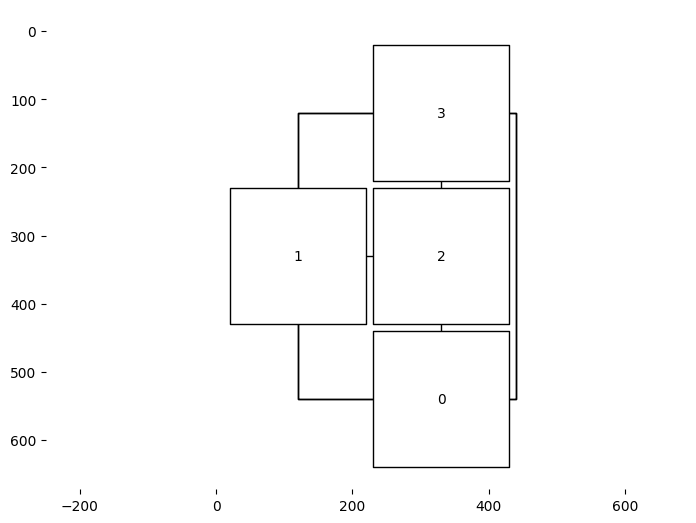

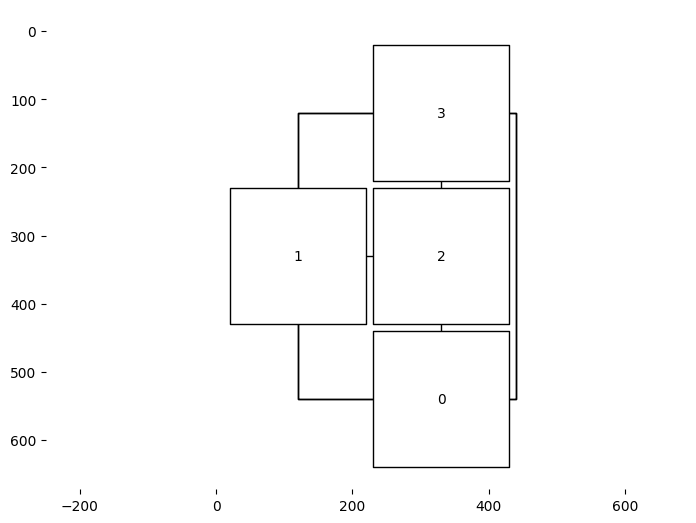

In [1]:
from ogdf_python import *

Tile_length = 200.0

cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/basic/graph_generators/deterministic.h")
cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/orthogonal/OrthoLayout.h")
cppinclude("ogdf/planarity/EmbedderMinDepthMaxFaceLayers.h")
cppinclude("ogdf/planarity/PlanarSubgraphFast.h")
cppinclude("ogdf/planarity/PlanarizationLayout.h")
cppinclude("ogdf/planarity/SubgraphPlanarizer.h")
cppinclude("ogdf/planarity/VariableEmbeddingInserter.h")

# cppinclude("ogdf/layered/SugiyamaLayout.h")

ogdf.EdgeArrow

G = ogdf.Graph()
ogdf.completeGraph(G, 4)
GA = ogdf.GraphAttributes(G, ogdf.GraphAttributes.all)
# define graph attributes
GA.directed=False

for n in G.nodes:
    GA.label[n] = "%s" % n.index()
    GA.width[n] = Tile_length
    GA.height[n] = Tile_length

for e in G.edges:
    GA.arrowType[e] =0

# SL = ogdf.PlanarizationLayout()
# SL.call(GA)
# GA

# Initialize layout components
pl = ogdf.PlanarizationLayout()
crossMin = ogdf.SubgraphPlanarizer()
ps = ogdf.PlanarSubgraphFast[int]()
ps.runs(100)
ves = ogdf.VariableEmbeddingInserter()
ves.removeReinsert(ogdf.RemoveReinsertType.All)

# Set up PlanarizationLayout components
crossMin.setSubgraph(ps)
crossMin.setInserter(ves)
pl.setCrossMin(crossMin)

# emb = ogdf.EmbedderMinDepthMaxFaceLayers()
# pl.setEmbedder(emb)

ol = ogdf.OrthoLayout()
ol.separation(10.0)
ol.cOverhang(0.4)

pl.setPlanarLayouter(ol)

pl.call(GA)
GA

In [2]:
pl.numberOfCrossings()

0

In [3]:
ogdf.GraphIO.write(GA, "4_complete.gml")

True